# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"


## Handwritten digit recognition (5 points, 1+2+2)
The [MNIST dataset](https://www.openml.org/d/554) contains 70,000 images of handwritten digits (0-9) represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

Class label: 5


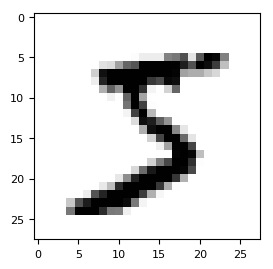

In [3]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
print("Class label:",y[0]) # Print the correct class label

- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 60,000 examples as the training set and the last 10,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?
- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?
    - Do the same but with 100 bootstrapping repeats. Are the results different? Explain.
- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?
    
Report all results clearly and interpret the results.  
Note: while prototyping/bugfixing, you can speed up experiments by taking a smaller sample of the data, but report your results as indicated above.

## Evaluate the k-Neareast Neighbor classifier with default settings. 

- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 60,000 examples as the training set and the last 10,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?

**Smaller data sets**

First we need to choose the proportion of data that we will be using as training and as test. Since we want to have 60,000 training examples and 10,000 test examples we need to choose the appropriate proportions. In this case the proportions would be given by :

$x_{train}=\frac{6}{7}$ and $x_{test}=\frac{1}{7}$

In [4]:
# Just in case you need to take less time 
#X=X[0:1000];y=y[0:1000]

In [5]:
percentage = 1/7 #Percentage of test data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# We split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=percentage , random_state=0)

# Label our method and train it with the train data.
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

**Predictive accuracy**

The predictive accuracy is obtained from evaluating the model created by Kneighbors on the test data that we have from the data split. 

In [6]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.84


**Few misclassifications**

To identify some of the missclassifications that we have from evaluating our test data, we need to compare to the true labels of these data. We use the already trained model applied to the test data and compare the labels of our model to the real ones.

In [7]:
# First we obtain the prediction labels for our test data
labeled_test = clf.predict(X_test)

# We get the indexes of the data which have been incorrectly labeled
index_of_incorrect = [labeled_test!=y_test]

# We extract the values that were given by our model incorrectly
incorrect_values = np.array([labeled_test[index_of_incorrect]])
incorrect_values=np.transpose(incorrect_values)

# We extract the data values of the incorrectly labeled data
incorrect_images = np.array(X_test[index_of_incorrect])

# We extract the real values that our algorithm should have identified (this are the real labels)
y_test_incorrect = np.array(y_test[index_of_incorrect])


Now we plot the images of the first ten incorrectly labeled samples. We also print the values of the correct class label and the predicted label to compare them.  

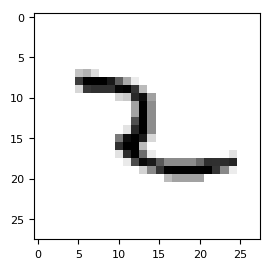

Real class label: 2 Algorithm labels [6]


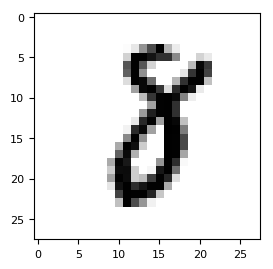

Real class label: 8 Algorithm labels [3]


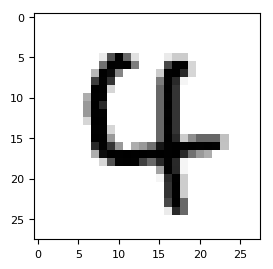

Real class label: 4 Algorithm labels [7]


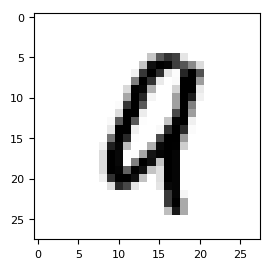

Real class label: 9 Algorithm labels [6]


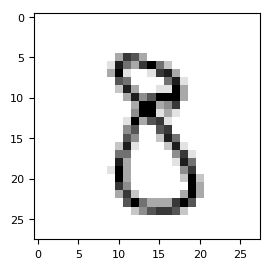

Real class label: 8 Algorithm labels [3]


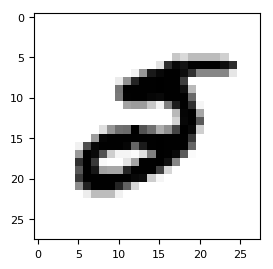

Real class label: 5 Algorithm labels [2]


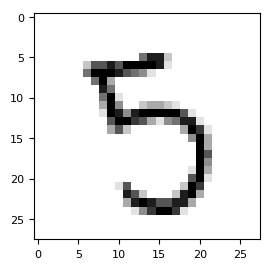

Real class label: 5 Algorithm labels [8]


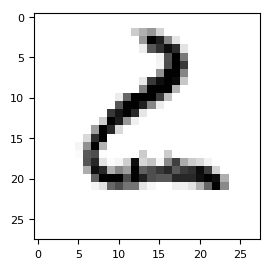

Real class label: 2 Algorithm labels [5]


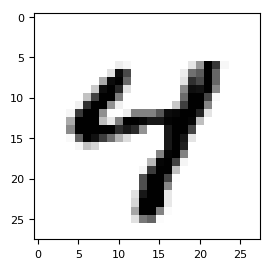

Real class label: 4 Algorithm labels [9]


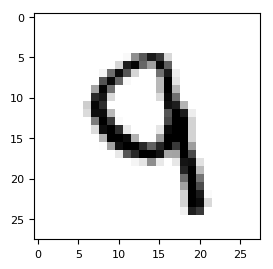

Real class label: 9 Algorithm labels [4]


In [8]:
for i in range(10):
    plt.imshow(incorrect_images[i].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
    plt.show()
    print("Real class label:",y_test_incorrect[i],"Algorithm labels",incorrect_values[i]) # Print the correct class label
    


From the examples obtained in the missclassifications we notice that sometimes there are some problems with certain classifications. For example: the number 1 can be easily missclasified as a 7 and viceversa as well as 9 and 4. Numbers that seem to have similar characteristics (round parts or vertical lines) tend to be missclassified by our algorithm.

One usefull way of visualizing the amount of errors commited by our algorithm is by using the confusion matrix.

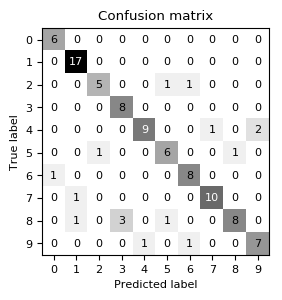

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
# We load the digits used and the results from trying our model in the test data.
digits = load_digits()
pred = labeled_test

# We create the confusion matrix with the number of correct and incorrect predictions for each digit.
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

From the confusion matrix we can already identify the number of correctly and incorrectly labeled data. Some extra information about which errors are commited for each digit is presented.

## Cross validation

- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?
    - Do the same but with 100 bootstrapping repeats. Are the results different? Explain.

First we will create a smaller data set with 10% of the original data. We will use the train_test_split function to do so. 

In [ ]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y

# We take a stratified subsample of the 10% of the data.
dummy, X_10percent, dummy, y_10percent = train_test_split(X, y,test_size=0.1 , random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_10fold = [];#Where we score the values
max_neighbors = 50;#Maximum number of neighbors
for k in range (max_neighbors):
    clf=KNeighborsClassifier(n_neighbors=k+1)
    scores_10fold.append(np.mean(cross_val_score(clf,X_10percent,y_10percent,cv=10)))
#Plot the accuracy in terms of the number of neighbors    
plt.plot(np.array(range(max_neighbors))+1,scores_10fold)
plt.title("Accuracy as a function of the number of neighbors k: 10fold")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors k")
plt.grid()



We will repeat this process but now for 100 bootstraps. We will use the ShuffleSplit to obtain the bootstraps by dividing the data into 66% train and 34% test.

In [ ]:
from sklearn.model_selection import ShuffleSplit
scores_bootstrap = [];
max_neighbors = 50;
shuffle_split = ShuffleSplit(test_size=.66, train_size=.34, n_splits=100)
for k in range (max_neighbors):
    clf=KNeighborsClassifier(n_neighbors=k+1)
    scores_bootstrap.append(np.mean(cross_val_score(clf,X_10percent,y_10percent,cv=shuffle_split)))
    
plt.plot(np.array(range(max_neighbors))+1,scores_bootstrap)
plt.title("Accuracy as a function of the number of neighbors k: Bootstrapping")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors k")
plt.grid()

Now we will compare the 10 fold cross validation with our bootstrapping cross validation into one same plot.

In [ ]:
# Plotting both sampling methods together. 
plt.plot(np.array(range(max_neighbors))+1,scores_10fold,label="10fold")    
plt.plot(np.array(range(max_neighbors))+1,scores_bootstrap,label="Bootstrapping")
plt.title("Accuracy as a function of the number of neighbors k")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors k")
plt.legend(loc="best")
plt.grid()

We observe a lower accuracy of the boostrapped data sets. We think that this is due to the fact that when carrying out the resampling for bootstrapping only 66% of the data is included on average after repeating this process. On the other hand, the kfold method includes all the data which results in a better performance on average.

The accuracy of both methods decrease with the number of neighbors. When we increase this number, we tend to compare more with the whole data set which results in the disipation of the effect of the local information. The best choice for the Kneighbors is to choose 1 neighbor only since in that way we are just taking into account local information resulting in small conflicts. Nevertheless as we have already seen, close data points (similar characteristics) can be misclassified.  

### Linear models

- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
percentage = 0.1 #Percentage of test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=percentage , random_state=0)

First we will compare the kNN model against the logistic regression and linear support vector machines (SVM) with the default hyperparameter settings.

In [ ]:
# K neighbors
clf = KNeighborsClassifier().fit(X_train,y_train)

# Logistic regression
logreg = LogisticRegression().fit(X_train,y_train)

# Support vector machines
linear_svc = LinearSVC().fit(X_train,y_train)
print("The score for the kNeighbors is: ",clf.score(X_test,y_test))
print("The score for the logistic regression is: ",logreg.score(X_test,y_test))
print("The score for the linear SVM is: ",linear_svc.score(X_test,y_test))

We notice that the method of the kNeighbors has an efficiency of _____ that is different to the linear methods of logistic regression and the support vector machine.

Now, we will optimize the linear classification models of logistic regression and SVM. We will check different orders of magnitud of the degree of regularization $C$. We will be using values of $C$ from $2^{-15}$ to $2^{15}$. We will be choosing between two types of penalties: L1 and L2 which add an extra term to the least squares cost function that tunes the characteristics of the weights in the model.

**L1 regularization**

$\lambda \sum_{i=1}^{k}|w_i|$


**L2 regularization**

$\lambda \sum_{i=1}^{k} w_i^2$

We will plot the accuracy of the linear models when applied to the test data and compare it with the kNeighbors method.

In [ ]:
# We are going to store the accuracy of the logistic regression and the SVC in terms of C
logistic = [];
svc = [];

# Values that C takes
C_values = 2**np.linspace(-15,15,31)

#Regularization
penalty_values = ['l1','l2']; 

#Loop in the C values and in the regularization.
for penalty in penalty_values:
    for C in C_values: 
        logreg = LogisticRegression(C=C,penalty=penalty).fit(X_train,y_train)
        logistic.append(logreg.score(X_test,y_test))
        linear_svc = LinearSVC(C=C,penalty=penalty,dual=False).fit(X_train,y_train)
        svc.append(linear_svc.score(X_test,y_test))    

In [ ]:
plt.plot(C_values,logistic[:31],'bx-',label = 'Logistic regression L1')
plt.plot(C_values,logistic[31:],'rx-', label = 'Logistic regression L2')
plt.plot(C_values,svc[:31],'gx-', label = 'SVC L1')
plt.plot(C_values,svc[31:],'mx-', label = 'SVC L2')
plt.title("Accuracy of logistic regression in terms of C")
plt.ylabel("Accuracy");
plt.xlabel("log(C)");
plt.legend();
plt.xscale('log');
plt.grid() 

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(C_values, logistic[:31])
ax1.set_title('Sharing Y axis')
ax2.scatter(C_values, svc[:31])

## Model selection (4 points (2+2))
Study how RandomForest hyperparameters interact on the Ionosphere dataset (OpenML ID 59).

- Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time. Use a nested cross-validation and a grid search (or random search) over the possible values, and measure the AUC. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal AUC performance you find?
- Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow AUC$ with AUC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

Hint: Running this experiment can take a while, so start early and use a feasible grid/random search. Start with a coarse grid or few random search iterations.
Hint: Use a log scale (1,2,4,8,16,...) for $n\_estimators$. Vary $max\_features$ linearly between 1 and the total number of features. Note that, if you give $max\_features$ a float value, it will use it as [the percentage of the total number of features](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


In [ ]:
ionosphere = oml.datasets.get_dataset(59) # Download Ionosphere data
X, y = ionosphere.get_data(target=ionosphere.default_target_attribute); # Get the predictors X and the labels y

## Decision tree heuristics (1 point)
Consider the toy training set created below. It predicts whether your date agrees to go out with you depending on the weather.

Learn a decision tree:

- Implement functions to calculate entropy and information gain
- What is the class entropy for the entire dataset? What is the information gain when you split the data using the *Water* feature?
- Implement a basic decision tree:
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).
- Now train a scikit-learn decision tree on the same data. Do you get the same result? Explain.

In [637]:
df = pd.DataFrame({"Sky":['sunny','sunny','rainy','sunny','sunny'],
                   "AirTemp":['warm','warm','warm','cold','warm'],
                   "Humidity":['normal','high','high','high','normal'],
                   "Wind":['strong','strong','strong','strong','weak'],
                   "Water":['warm','warm','cool','warm','warm'],
                   "Forecast":['same','same','change','change','same'],
                   "Date?":['yes','yes','no','yes','no']
                   });
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']] # Fix column ordering
df # print

,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,warm,high,strong,cool,change,no
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


First we will complete the functions for the entropy and the information gain. These functions are given by the following formula:

** Entropy ** 

$$ E(X) = -\sum_{k=1}^K \hat{p}_k \log_{2}\hat{p}_k $$

** Information gain ** (After doing a partition)

$$ G(X,X_i) = E(X) - \sum_{v=1}^V \frac{|X_{i=v}|}{|X_{i}|} E(X_{i=v}) $$

where $\hat{p}_k$ = the relative frequency of class $k$ in the leaf node,  $X$ = the training set, containing $i$ features (variables) $X_i$, $v$ a specific value for $X_i$, $X_{i=v}$ is the set of examples having value $v$ for feature $X_i$: $\{x \in X | X_i = v\}$

In [638]:
# Entropy function
def entropy(pos, neg):
    # Take care of pos=0 and neg=0
    if pos==0 and neg==0:
        return 0
    # First it takes the rates of the possible categories defined as positives and negatives.
    p_1 = pos/(pos+neg)
    p_2 = neg/(pos+neg)
    # We take into account the possible cases where one of the categories is not present. 
    # In this way we avoid the NaN errors given by the logarithm_2.
    if p_1 == 0:
        return -p_2*np.log2(p_2)
    elif p_2 == 0:
        return -p_1*np.log2(p_1)
    else :
        return -(p_1*np.log2(p_1)+p_2*np.log2(p_2))
    
    
# Info gain
def info_gain(pos1,neg1,pos2,neg2):
    # To calculate the information gain first we calculate the total entropy of the data without partitions
    total_entropy = entropy(pos1+pos2,neg1+neg2)
    # We take care of the cases where one category doesn't have elements in the partition
    if pos1+neg1==0 or pos2+neg2==0:
        return 0
    else:
        # Calculation of the important quantities.
        total_values = pos1+neg1+pos2+neg2 #Total number of data
        entropy1 = entropy(pos1,neg1) #Entropy of the first split 
        entropy2 = entropy(pos2,neg2) #Entropy of the second split
        total1 = pos1+neg1 #Total number of elements in the first split
        total2 = pos2+neg2 #Total number of elements in the second split
        # Weighted sum is the new entropy of the sistem after the partition
        weighted_sum = (total1*entropy1/total_values) + (total2*entropy2/total_values)
        # Return the info gain in terms of total entropy and the entropy of the split
        return total_entropy-weighted_sum

**Entropy of the data**

The total entropy is given by the values of the date? feature. Our positive values will be identified by the 'yes' (positive) category and our negative by the 'no' (negative). From the total amount of data that has positive and negative values we calculate the entropy of the system given by:

In [639]:
pos = sum(df.values[:,-1]=='yes')
neg = sum(df.values[:,-1]=='no')
entropy(pos,neg)

0.97095059445466858

The entropy of our system starts at 0.97 since we don't have the same amount of values of 'yes' and 'no' (equal probabilities) which leads to a 1 in the entropy.

**Information gain for water feature**


Now we will see how it affects the information gain when we do a partition on the water feature. First we will have to count the positive and negative values after doing a split conditioned on the water feature. This partition lead in two kinds of positive categories ('cool' & 'yes','warm' & 'yes') and two negatives ('cool' & 'no', 'warm' & 'no'). We use the cardinality of these 4 categories as input values of our information gain function. 

In [640]:
pos1 = sum([a and b for a, b in zip(df.values[:,-1]=='yes',df.values[:,-3]=='cool')])
pos2 = sum([a and b for a, b in zip(df.values[:,-1]=='yes',df.values[:,-3]=='warm')])
neg1 = sum([a and b for a, b in zip(df.values[:,-1]=='no',df.values[:,-3]=='cool')])
neg2 = sum([a and b for a, b in zip(df.values[:,-1]=='no',df.values[:,-3]=='warm')])
print("\nThe info gain after partitioning the water feature is: ",info_gain(pos1,neg1,pos2,neg2))


The info gain after partitioning the water feature is:  0.321928094887


We can see that after doing the partition the entropy measure decreases which means that the predictability of the data has increased. This means that the entropy after the partition is smaller by an amount equal to the info gain.

### Implementation of a basic decision tree
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).
- Now train a scikit-learn decision tree on the same data. Do you get the same result? Explain.

To implement a basic decision tree first we will define a function that will be useful to us. This function takes a data frame and identifies the feature that has the highest info gain. It gives as an output the index of the column where this increment was found and the actual value of the information gain for this feature.

In [641]:
def DataFrameInfoGain(df):
    #List where we will append the column number and its information gain.
    info_gain_data=[];
    #We check each of the columns for the information gain
    for i in range(len(df.columns)-1):
        #We count the number of positives and negatives in each category after the split of the ith feature
        pos1 = sum([a and b for a, b in zip(df.values[:,-1]=="yes",df.values[:,i]==df.values[:,i][0])])
        pos2 = sum([a and b for a, b in zip(df.values[:,-1]=="yes",df.values[:,i]!=df.values[:,i][0])])
        neg1 = sum([a and b for a, b in zip(df.values[:,-1]!="yes",df.values[:,i]==df.values[:,i][0])])
        neg2 = sum([a and b for a, b in zip(df.values[:,-1]!="yes",df.values[:,i]!=df.values[:,i][0])])
        #We store the index of the feature and the information gain. We use our function defined previously.
        info_gain_data.append([i,info_gain(pos1,neg1,pos2,neg2)]) 
    #Return the index of the feature with the maximum information gain and the value of the maximum gain.
    return max(info_gain_data, key = lambda t: t[1])  

Now we will procede with the implementation of our algorithm. 

In [642]:
partitions=[]; #list with the data frames according to the nodes-features splitted.
partitions.append([df])
nodes=["Original data","Original data"]; #Nodes that indicate which feature is splitted
split=["No split yet"]; #Categories of the nodes
leaves=["No nodes yet"]; #Previous value of the nodes
leaves2=["No nodes"] #In this list we will save the final values of the leaves at the end of the tree
final_count=[] #We will count the number of positives and negatives in each leaf.
i = 0; #Dummy variable for counting iterations
while 1==1:
    joint = []
    # We iterate over all the splits of the previous step
    for j in range(len(partitions[i])):
        cp = partitions[i][j] #We name cp as the current partition of data we are checking.
        # We extract the index of the feature with the highest information gain
        # with the function DataFrameInfoGain described previously
        number_split, entropydifference = DataFrameInfoGain(cp) #Index of feature and max info gain.
        if abs(entropydifference)==0: #If the highest information gain is zero we stop our loop.
            #If we have reached a leaf (no further splitting) we store its value.
            leaves2.append([leaves[i],split[i][j]])
            #We add the total number of yes and no for the leaf
            final_count.append(['Yes',sum(cp['Date?']=='yes'),'No' ,sum(cp['Date?']=='no')])
            #We move on to the next branch
            print("Found a leaf: Next branch")
            continue
            
        # We extract the string with the feature of the highest info gain
        feature_split =cp.columns[DataFrameInfoGain(cp)[0]]
        
        # We define the partition of our feature and split the data according to this feature
        first_partition = cp.ix[cp[feature_split]==cp.values[:,number_split][0]]
        second_partition = cp.ix[cp[feature_split]!=cp.values[:,number_split][0]]
        
        # We store the unique values of the feature that we have splitted in the correct order
        split.append(df[feature_split].unique())
        
        # We delete the feature chosen from the partitions to avoid choosing it again in the next steps
        del first_partition[feature_split]
        del second_partition[feature_split]
        
        leaves.append(split[i][j])
        # Storing the two partitions of the data. If the feature can't be splitted we don't append 
        # a second partition
        
        if len(first_partition)!=0:
            joint.append(first_partition)
        if len(second_partition)!=0:
            joint.append(second_partition)
    # We store the feature that we have just splitted as a node.
    nodes.append(feature_split)
    # We store the new partitions of the data.
    partitions.append(joint)
    i = i+1; #Increase dummy variable.
    # If the partition has not increased in size, then we stop. We have reached our maximum depth.
    total_entropy=0; 
    #We stop our iterations if there are no further partitions. (The new partition is empty)
    if len(partitions[i])==0:
        print("No more improvement")
        break

Found a leaf: Next branch
Found a leaf: Next branch
Found a leaf: Next branch
No more improvement


Now we will output our results into a coherent way.

We state the node that we have used for each branch (that is, the feature we have splitted), the possible values that node takes and the split of the data that the new node has caused with respect to the previous node. The output also shows the previous node taken for subsequent partition, this node is called the father of the current node. 

At the end we see the values of the leaves and the corresponding count of "yes" and "no" values for each leaf. 

In [643]:
# Now we will print all the proper values.
for i in range(len(partitions)-1):
    print("\n\n","Node number ", i,"is given by",nodes[i+1]) #Printing the nodes-features splitted
    print("\n Previous node value (father)",nodes[i],"= ",leaves[i]) 
    print("\n Split of node into: ",split[i])
    for j in range(len(partitions[i])):
        #Printing the data frames that correspond to the values of each 
        print("\nFeature ",nodes[i+1], "with value", split[i][j]) 
        print("\n",partitions[i][j])
    print("-----------------------\n")
    
print("The final leaves are given by:\n",leaves2)
print("\nWith the respective counts for yes and no\n",final_count)



 Node number  0 is given by Original data

 Previous node value (father) Original data =  No nodes yet

 Split of node into:  No split yet

Feature  Original data with value N

      Sky AirTemp Humidity    Wind Water Forecast Date?
0  sunny    warm   normal  strong  warm     same   yes
1  sunny    warm     high  strong  warm     same   yes
2  rainy    warm     high  strong  cool   change    no
3  sunny    cold     high  strong  warm   change   yes
4  sunny    warm   normal    weak  warm     same    no
-----------------------



 Node number  1 is given by Sky

 Previous node value (father) Original data =  N

 Split of node into:  ['sunny' 'rainy']

Feature  Sky with value sunny

   AirTemp Humidity    Wind Water Forecast Date?
0    warm   normal  strong  warm     same   yes
1    warm     high  strong  warm     same   yes
3    cold     high  strong  warm   change   yes
4    warm   normal    weak  warm     same    no

Feature  Sky with value rainy

   AirTemp Humidity    Wind Water F

Our algorithm has defined the nodes: Sky[sunny,rainy] and Wind[strong,weak]. 

The final leaves of the tree are given by: [rainy][sunny,strong][sunny,weak]

With the corresponding values for their counts. 

The final counts crearly show that the data has been split into the two date? categories

"Yes":[sunny,strong] and "No"[rainy][sunny,weak]

Now we will compare our algorithm with the scikit implementation as follows:

To train our tree with the scikit algorithm, first we have to convert our data frame into a numeric array of zeros and ones according to the values of the features. 

In [644]:
binary = np.zeros(df.shape)
for j in range(len(df.columns)):
    for i in range(len(df[df.columns[j]])):
        #We take as a 1 the first value that appears in each column
        if df[df.columns[j]][i]==df[df.columns[j]][0]: 
            binary[i][j]=1
# We define our target value which is Date?
y = binary[:,-1]
# We define our training set of features
X = binary[:,:-1]
print(X,y)

[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.]
 [ 0.  1.  0.  1.  0.  0.]
 [ 1.  0.  0.  1.  1.  0.]
 [ 1.  1.  1.  0.  1.  1.]] [ 1.  1.  0.  1.  0.]


We define our tree classifier using the entropy criterion and fit our data.

In [645]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X, y)
tree.export_graphviz(clf,out_file='tree.dot')   

Finally we visualize our tree to compare it with our implemented algorithm.

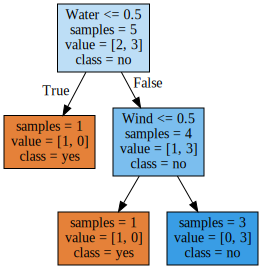

In [646]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=["yes", "no"], 
feature_names=df.columns[:-1], impurity=False, filled=True)
# Open and display
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In this case we have obtained different nodes and leaves compared to our implementation.

**Our implementation**

Nodes = Sky[sunny,rainy]Wind[strong,weak]

Leaves = [rainy][sunny,strong][sunny,weak]

**Scikit**

Nodes = Water[warm,cool]Wind[strong,weak]

Leaves = [cool][warm,strong][warm,weak]

It is different since our implementation depends on the order of the columns of the data frame. If we change the order of our data frame we will get the same result as with scikit. We can see it in the following:

**New ordering**

In [648]:
df = pd.DataFrame({"Sky":['sunny','sunny','rainy','sunny','sunny'],
                   "AirTemp":['warm','warm','warm','cold','warm'],
                   "Humidity":['normal','high','high','high','normal'],
                   "Wind":['strong','strong','strong','strong','weak'],
                   "Water":['warm','warm','cool','warm','warm'],
                   "Forecast":['same','same','change','change','same'],
                   "Date?":['yes','yes','no','yes','no']
                   });
df = df[['Water','Wind','Sky', 'AirTemp', 'Humidity',   'Forecast', 'Date?']] # Fix column ordering
df # print

,Water,Wind,Sky,AirTemp,Humidity,Forecast,Date?
0,warm,strong,sunny,warm,normal,same,yes
1,warm,strong,sunny,warm,high,same,yes
2,cool,strong,rainy,warm,high,change,no
3,warm,strong,sunny,cold,high,change,yes
4,warm,weak,sunny,warm,normal,same,no


We have changed the order so the characteristics that scikit identifies are more to the left.

We repeat the use of our algorithm

In [654]:
partitions=[]; #list with the data frames according to the nodes-features splitted.
partitions.append([df])
nodes=["Original data","Original data"]; #Nodes that indicate which feature is splitted
split=["No split yet"]; #Categories of the nodes
leaves=["No nodes yet"]; #Previous value of the nodes
leaves2=["No nodes"] #In this list we will save the final values of the leaves at the end of the tree
final_count=[] #We will count the number of positives and negatives in each leaf.
i = 0; #Dummy variable for counting iterations
while 1==1:
    joint = []
    # We iterate over all the splits of the previous step
    for j in range(len(partitions[i])):
        cp = partitions[i][j] #We name cp as the current partition of data we are checking.
        # We extract the index of the feature with the highest information gain
        # with the function DataFrameInfoGain described previously
        number_split, entropydifference = DataFrameInfoGain(cp) #Index of feature and max info gain.
        if abs(entropydifference)==0: #If the highest information gain is zero we stop our loop.
            #If we have reached a leaf (no further splitting) we store its value.
            leaves2.append([leaves[i],split[i][j]])
            #We add the total number of yes and no for the leaf
            final_count.append(['Yes',sum(cp['Date?']=='yes'),'No' ,sum(cp['Date?']=='no')])
            #We move on to the next branch
            print("Found a leaf: Next branch")
            continue
            
        # We extract the string with the feature of the highest info gain
        feature_split =cp.columns[DataFrameInfoGain(cp)[0]]
        
        # We define the partition of our feature and split the data according to this feature
        first_partition = cp.ix[cp[feature_split]==cp.values[:,number_split][0]]
        second_partition = cp.ix[cp[feature_split]!=cp.values[:,number_split][0]]
        
        # We store the unique values of the feature that we have splitted in the correct order
        split.append(df[feature_split].unique())
        
        # We delete the feature chosen from the partitions to avoid choosing it again in the next steps
        del first_partition[feature_split]
        del second_partition[feature_split]
        
        leaves.append(split[i][j])
        # Storing the two partitions of the data. If the feature can't be splitted we don't append 
        # a second partition
        
        if len(first_partition)!=0:
            joint.append(first_partition)
        if len(second_partition)!=0:
            joint.append(second_partition)
    # We store the feature that we have just splitted as a node.
    nodes.append(feature_split)
    # We store the new partitions of the data.
    partitions.append(joint)
    i = i+1; #Increase dummy variable.
    # If the partition has not increased in size, then we stop. We have reached our maximum depth.
    total_entropy=0; 
    #We stop our iterations if there are no further partitions. (The new partition is empty)
    if len(partitions[i])==0:
        print("No more improvement")
        break

Found a leaf: Next branch
Found a leaf: Next branch
Found a leaf: Next branch
No more improvement


This time we only print the leaves to avoid extra output.

In [655]:
print("The final leaves are given by:\n",leaves2)
print("\nWith the respective counts for yes and no\n",final_count)

The final leaves are given by:
 ['No nodes', ['N', 'cool'], ['warm', 'strong'], ['warm', 'weak']]

With the respective counts for yes and no
 [['Yes', 0, 'No', 1], ['Yes', 3, 'No', 0], ['Yes', 0, 'No', 1]]


Our final result using this new ordering is identical to the one of scikit. So, both algorithms just differ in how they decide to choose a node when there is a tie in the entropy gain.

## Random Forests (4 points (1+1+2))
Study the effect of the number of trees in a RandomForest on the EEG-eye-state dataset (http://www.openml.org/d/1471). This dataset measures brain activity using 15 sensors, and you need to predict whether the person's eyes are open or closed. 

* Train a RandomForest classifier on this dataset with an increasing number of trees (on a log scale as above). Plot the Out-Of-Bag error against the number of trees.
    - The Out-Of-Bag error is the test error obtained when using bootstrapping, and using the non-drawn data points as the test set. This is what a RandomForest does internally, so you can retrieve it from the classifier. The code below hints on how to do this.
* Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error. Compare the two. What do you learn from this?
* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

Hint: Error rate = 1 - accuracy  
Hint: We discussed bias-variance decomposition in class. It is not included in scikit-learn, so you'll need to implement it yourself.

In [668]:
eeg = oml.datasets.get_dataset(1471) # Download Ionosphere data
X, y = eeg.get_data(target=eeg.default_target_attribute);

# Out of bag errors can be retrieved from the RandomForest classifier. You'll need to loop over the number of trees.
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(oob_score=True,)
clf.fit(X, y)
(1 - clf.oob_score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

0

### Out-of-bag error

* Train a RandomForest classifier on this dataset with an increasing number of trees (on a log scale as above). Plot the Out-Of-Bag error against the number of trees.
    - The Out-Of-Bag error is the test error obtained when using bootstrapping, and using the non-drawn data points as the test set. This is what a RandomForest does internally, so you can retrieve it from the classifier. The code below hints on how to do this.

First we will obtain the Out-of-bag error from the Random forest with different numbers of trees in a range of $2^1-2^{10}$. We will retrieve the OOB error from the classifier and plot it against the number of trees used. 

In [342]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn import ensemble

# We define the number of trees that we will be using for our random forest.
trees = 2**np.linspace(1,10,10)
trees = trees.astype(int)

# We define a list where we will be storing the values of our oob score
oob = [];

for i in trees:
    # We define our random forest for n_estimators (trees), train it and extract the oob error.
    forest = RandomForestClassifier(n_estimators=i, random_state=2,oob_score=True)
    out = forest.fit(X,y)
    oob.append(1 - forest.oob_score_)
    


Now we will plot our results.

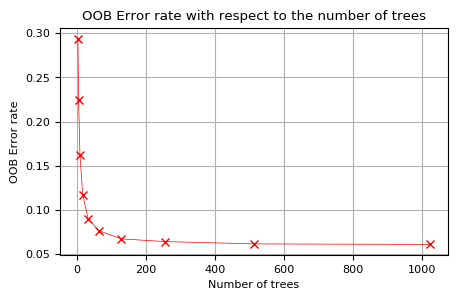

In [343]:
plt.plot(trees, oob, '-rx')
plt.xlabel("Number of trees")
plt.ylabel("OOB Error rate")
plt.title("OOB Error rate with respect to the number of trees")
plt.grid()
plt.show()

From the plot we can notice that the OOB error decreases with the number of trees. This is a natural result since we are averaging the efect of the multiple trees. When we increase the number of trees it results in a more weighted test from the multiple samples taken within the data. 

**10 fold error**

Now we will obtain the error rate from using 10-fold cross validation. The error rate is given by the average of the accuracy of our 10-fold validations created by dividing the data. 

In [345]:
from sklearn.model_selection import cross_val_score

# Number of trees used.
trees = 2**np.linspace(1,10,10)
trees = trees.astype(int)

# List in which we will store the error rate values. 
error = [];

# Number of folds used in the cross validation.
cv = 10;


for i in trees: 
    random_forest = RandomForestClassifier(n_estimators=i, random_state=2,oob_score=False)
    scores = cross_val_score(random_forest, X, y, cv=cv)
    error.append(1-np.mean(scores))

Now we plot the error rate of the 10-fold cross validation of the random forest. 

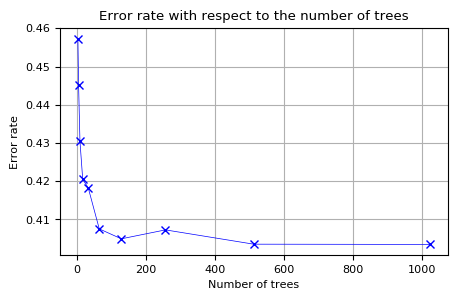

In [346]:
plt.plot(trees,error,'-bx')
plt.xlabel("Number of trees")
plt.ylabel("Error rate")
plt.title("Error rate with respect to the number of trees")
plt.legend(loc="best")
plt.grid()
plt.show()

We plot both error rates together to compare the difference between both. 

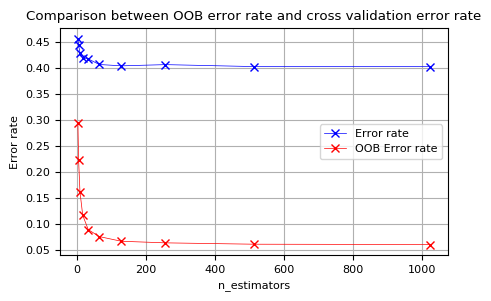

In [347]:
plt.plot(trees,error,'-bx',label="Error rate 10-fold")
plt.plot(trees,oob,'-rx',label="OOB Error rate")
plt.xlabel("n_estimators")
plt.ylabel("Error rate")
plt.grid()
plt.title("Comparison between OOB error rate and cross validation error rate")
plt.legend(loc="best")
plt.show()

First we need to recall that the random forest takes a bootstrap sample of the data that leaves out about 33-36% of the data. 


The 10-fold cross validation makes 10 partitions of the data and carries out the random forest learning algorithm with 9 training pieces of data and 1 as a test. It then changes the role of each piece such that each piece is at least once a test data. We obtain 10 accuracy values and then we take an average of them.

When using this cross validation in a random forest we are leaving a great quantity of data unprocessed. Take for example one of these folds. 10% of the data is used already as a test and the other 90% is used for training. But from these 90% about 33-36% of the data is not used for the creation of the forest which leaves at least 32.4% of the total data unused in this training. If we are really unlucky it can happen that 32.4% of the data is not used at all in any of our folds. This unused data translates into less training information for our algorithm and into a decrease of the accuracy of our model as we can see from the plots above. 

In conclusion, in some sense the random forest is doing by itself a kind of cross-validation which increases the accuracy whenever we increase the number of trees taken. We have to be careful when carrying out an additional cross-validation since we might leave some data out of the training. 

### Comparison of decision tree with random forest

* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

**Performance**

First we will compare the performance of the RandomForest with the decision tree. Random forest takes 10 estimators as default.

In [348]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# First we split our data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# We proceed to train the random forest and the decision tree.
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
a = random_forest.fit(X_train,y_train)
b = decision_tree.fit(X_train,y_train)

# We print out the performance of each model
print("\n The performance of the random forest is: ", random_forest.score(X_test,y_test))
print("\n The performance of the decision tree is: ", decision_tree.score(X_test,y_test))




 The performance of the random forest is:  0.895594125501

 The performance of the decision tree is:  0.832576769025


As expected, the random forest has a better accuracy since it takes several trees from the data given and each member returns a probability for splitting each class. 

** Bias and variance**

We will calculate now the bias and the variance. 

For binary classification we need to take 100 bootstraps (samples with replacement). Then we need to follow the computations given below:
    
**Bias of a point $x$**

Let $x$ be a data value in our set.

$bias(x)= P(f(x)\neq y_x)$

That means that it is the missclasification ration of point $x$

The total bias is given by: $\sum_{x} w_xbias(x)^2$

Where $w_x=P(x)$ (the probability of x occuring in test data). 

**Variance of a point $x$**

Let $x$ be a data value in our set.

$variance(x)=\frac{1-P(f(x)\in C_1)^2-P(f(x)\in C_2)^2}{2}$

Where $P(f(x)\in C_i)$ is the ratio of class $i$ prediction for $x$

The total variance is given by: $\sum_{x} w_xvariance(x)  $
    

In [672]:
def BiasVariance(clf,X,y,n_repeat):
    # Bootstraps
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]


    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        a = clf.fit(X[train_index], y[train_index])
        y_pred = clf.predict(X[test_index])

        # Store predictions
        for i,index in enumerate(test_index):
            y_all_pred[index].append(y_pred[i])

    # Compute bias, variance, error
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
               for i,x in enumerate(y_all_pred)])
    print("Bias squared: %.2f, Variance: %.2f" % (bias_sq, var))
    return(bias_sq,var)

In [686]:
n_repeat = 100
clf = DecisionTreeClassifier()
print("Single tree classifier\n")
BiasVariance(clf,X,y,n_repeat)
print("Random forest classifier\n")
clf = RandomForestClassifier(n_estimators=10)
BiasVariance(clf,X,y,n_repeat)

Single tree classifier

Bias squared: 321.71, Variance: 532.08


(321.7087696450784, 532.0812303549048)

Random forest classifier

Bias squared: 284.31, Variance: 263.82


(284.3061967271442, 263.82380327285995)

As we can see from the previous result. Our single tree has a bias and a variance larger compared to the random forest. It seems that the predictions get more accurate and less disperse with the amount of trees. We will verify this by using different amounts of trees and see the behavior of the bias and the variance.

In [675]:
# Number of trees that we will be comparing.
trees = 2**np.linspace(1,8,8)
trees = trees.astype(int)
# List with the values of the bias for each number of trees
bias = np.zeros(len(trees))
# List with the values of the variance for each number of trees
variance = np.zeros(len(trees))
j=0
for i in trees:
    clf = RandomForestClassifier(n_estimators=i)
    bias[j],variance[j]=BiasVariance(clf,X,y,n_repeat)
    j=j+1


Bias squared: 520.44, Variance: 514.84
Bias squared: 366.37, Variance: 402.37
Bias squared: 294.80, Variance: 293.36
Bias squared: 273.12, Variance: 208.54
Bias squared: 268.49, Variance: 154.22
Bias squared: 272.40, Variance: 119.07
Bias squared: 279.12, Variance: 96.71
Bias squared: 278.97, Variance: 82.64


We plot our results.

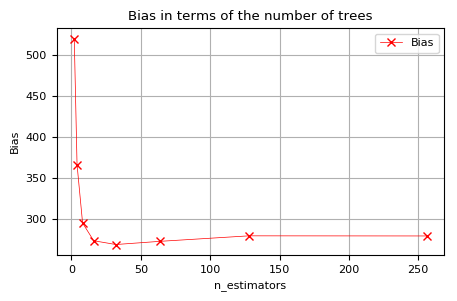

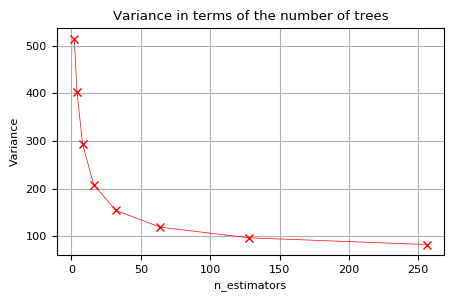

In [685]:
plt.plot(trees, bias,'-rx',label='Bias')
plt.xlabel("n_estimators")
plt.ylabel("Bias")
plt.grid()
plt.title("Bias in terms of the number of trees")
plt.legend(loc="best")
plt.show()
ax1 = fig.add_subplot(121)
plt.plot(trees,variance,'-rx')
plt.xlabel("n_estimators")
plt.ylabel("Variance")
plt.grid()
plt.title("Variance in terms of the number of trees")
plt.legend(loc="best")
plt.show()

As we can notice the value of the variance and the bias decreases with the number of trees. That means that the predictions get more specific and less dispersed for each of the bootstraps. This makes sense since we are taking a more averaged decision on how to classify our data. Now we will see what happens to the area under the curve.

In [370]:
from sklearn.metrics import roc_auc_score

# First we split the data to calculate the area under the curve
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# We define both of our classifiers
random_forest = RandomForestClassifier()
a = random_forest.fit(X_train, y_train)
decision_tree = DecisionTreeClassifier()
b = decision_tree.fit(X_train,y_train)

random_forest_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
decision_tree_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(random_forest_auc))
print("AUC for Decision Tree: {:.3f}".format(decision_tree_auc))

AUC for Random Forest: 0.959
AUC for Decision Tree: 0.832


The area under the curve corresponds to the integral of the TPR with respect to the FPR. If we have random guessing of categorios the value of the integral is 0.5. In our case the Random forest has a larger AUC compared to the Decision tree. This means that OVERALL there is a higher true positive rate compared to the false positive rate. It is more likely that we will identify true positives than false positives. 

The higher the AUC the better, the AUC gives a good general idea of the method. Nevertheless it skips to provide details about the parameters and the TPR and FPR. To find out it is good to do a ROC curve.

We will also analyze how the area under the curve changes with respect to the number of trees of the random forest. 

In [371]:
trees = 2**np.linspace(1,10,10)
trees = trees.astype(int)
AUC_random_forest = []
for i in trees:
    random_forest = RandomForestClassifier(n_estimators=i, random_state=2)
    out = random_forest.fit(X_train, y_train)
    random_forest_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
    AUC_random_forest.append(random_forest_auc)
    #print("AUC for Random Forest: {:.3f}".format(random_forest_auc), " with ",i," trees")

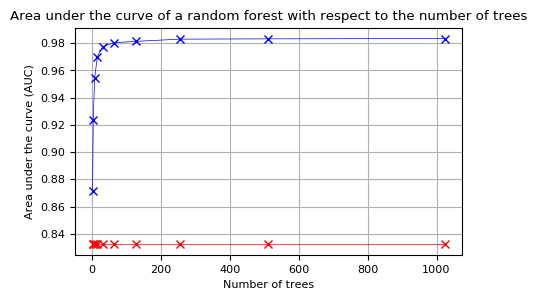

In [659]:
plt.plot(trees,AUC_random_forest,'-bx',label='Random forest')
plt.plot(trees,decision_tree_auc*np.ones(len(trees)),'-rx',label='Single decision tree')
plt.xlabel("Number of trees")
plt.ylabel("Area under the curve (AUC)")
plt.legend(loc="best")
plt.title("Area under the curve of a random forest with respect to the number of trees")
plt.grid()

As we can notice, the AUC increases dramatically for the first values of trees between 2 and 200. After 200 the value only increases a little for each new iteration. Comparing to the AUC of a single tree we can see that we quickly depart from its performance by increasing the number of trees. 

## A regression benchmark (1 point)
Consider the liver-disorder dataset (http://www.openml.org/d/8). The goal is to predict how much alcohol someone consumed based on blood test values.

- Take a selection of the algorithms that we covered in class that can do regression.
- Based on what you learned in the previous exercises, make educated guesses about good hyperparameter values and set up a grid or random search.
- Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE). Report all results. Which model yields the best results?

In [ ]:
liver = oml.datasets.get_dataset(8) # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute);